<a href="https://colab.research.google.com/github/adnan855570/Machine-Learning/blob/main/Diwali_Sales_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Loading**

In [41]:
import pandas as pd

# Load the dataset with a different encoding
file_path = '/content/Diwali Sales Data.csv'
diwali_sales_data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Attempt to load the dataset with a different encoding to handle potential encoding issues
diwali_sales_data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset to understand its structure
diwali_sales_data.head(), diwali_sales_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


(   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
 0  1002903  Sanskriti  P00125942      F     26-35   28               0   
 1  1000732     Kartik  P00110942      F     26-35   35               1   
 2  1001990      Bindu  P00118542      F     26-35   35               1   
 3  1001425     Sudevi  P00237842      M      0-17   16               0   
 4  1000588       Joni  P00057942      M     26-35   28               1   
 
             State      Zone       Occupation Product_Category  Orders  \
 0     Maharashtra   Western       Healthcare             Auto       1   
 1  Andhra Pradesh  Southern             Govt             Auto       3   
 2   Uttar Pradesh   Central       Automobile             Auto       3   
 3       Karnataka  Southern     Construction             Auto       2   
 4         Gujarat   Western  Food Processing             Auto       2   
 
     Amount  Status  unnamed1  
 0  23952.0     NaN       NaN  
 1  23934.0     NaN       NaN  
 2  23

# **Data Preprocessing**

In [42]:
# Drop irrelevant columns
diwali_sales_data_cleaned = diwali_sales_data.drop(columns=['Status', 'unnamed1'])

# Handle missing values in the 'Amount' column by filling with the mean of the column
diwali_sales_data_cleaned['Amount'].fillna(diwali_sales_data_cleaned['Amount'].mean(), inplace=True)

# Encode categorical variables
# We'll use one-hot encoding for categorical variables like 'Gender', 'State', 'Zone', 'Occupation', and 'Product_Category'
diwali_sales_data_encoded = pd.get_dummies(diwali_sales_data_cleaned, columns=['Gender', 'State', 'Zone', 'Occupation', 'Product_Category'], drop_first=True)

# Display the cleaned and encoded dataframe's first few rows to confirm
print(diwali_sales_data_encoded.head())



   User_ID  Cust_name Product_ID Age Group  Age  Marital_Status  Orders  \
0  1002903  Sanskriti  P00125942     26-35   28               0       1   
1  1000732     Kartik  P00110942     26-35   35               1       3   
2  1001990      Bindu  P00118542     26-35   35               1       3   
3  1001425     Sudevi  P00237842      0-17   16               0       2   
4  1000588       Joni  P00057942     26-35   28               1       2   

    Amount  Gender_M  State_Bihar  ...  Product_Category_Furniture  \
0  23952.0     False        False  ...                       False   
1  23934.0     False        False  ...                       False   
2  23924.0     False        False  ...                       False   
3  23912.0      True        False  ...                       False   
4  23877.0      True        False  ...                       False   

   Product_Category_Games & Toys  Product_Category_Hand & Power Tools  \
0                          False                       

# **Descriptive Statistics**

In [60]:
# Running descriptive statistics on the dataset
descriptive_stats = diwali_sales_data_encoded.describe()

# Displaying the descriptive statistics
print(descriptive_stats)


            User_ID           Age  Marital_Status        Orders        Amount  \
count  1.125100e+04  11251.000000    11251.000000  11251.000000  11251.000000   
mean   1.003004e+06     35.421207        0.420318      2.489290   9453.610858   
std    1.716125e+03     12.754122        0.493632      1.115047   5219.569870   
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000   
25%    1.001492e+06     27.000000        0.000000      1.500000   5443.500000   
50%    1.003065e+06     33.000000        0.000000      2.000000   8110.000000   
75%    1.004430e+06     43.000000        1.000000      3.000000  12671.000000   
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000   

         Age_Orders  Marital_Orders  Avg_Order_Value  
count  11251.000000    11251.000000     11251.000000  
mean      88.281842        1.044263      4958.377115  
std       52.885084        1.422235      4206.392024  
min       12.000000        0.000000        53.2500

# **Feature Engineering**

In [43]:
# Create new interaction features
diwali_sales_data_encoded['Age_Orders'] = diwali_sales_data_encoded['Age'] * diwali_sales_data_encoded['Orders']
diwali_sales_data_encoded['Marital_Orders'] = diwali_sales_data_encoded['Marital_Status'] * diwali_sales_data_encoded['Orders']

# Calculate average order value as a new feature
diwali_sales_data_encoded['Avg_Order_Value'] = diwali_sales_data_encoded['Amount'] / diwali_sales_data_encoded['Orders']

# Display the first few rows to check the new features
print(diwali_sales_data_encoded[['Age', 'Orders', 'Age_Orders', 'Marital_Orders', 'Avg_Order_Value']].head())




   Age  Orders  Age_Orders  Marital_Orders  Avg_Order_Value
0   28       1          28               0     23952.000000
1   35       3         105               3      7978.000000
2   35       3         105               3      7974.666667
3   16       2          32               0     11956.000000
4   28       2          56               2     11938.500000


# **Exploratory Data Analysis**

Distribution of Amount spent

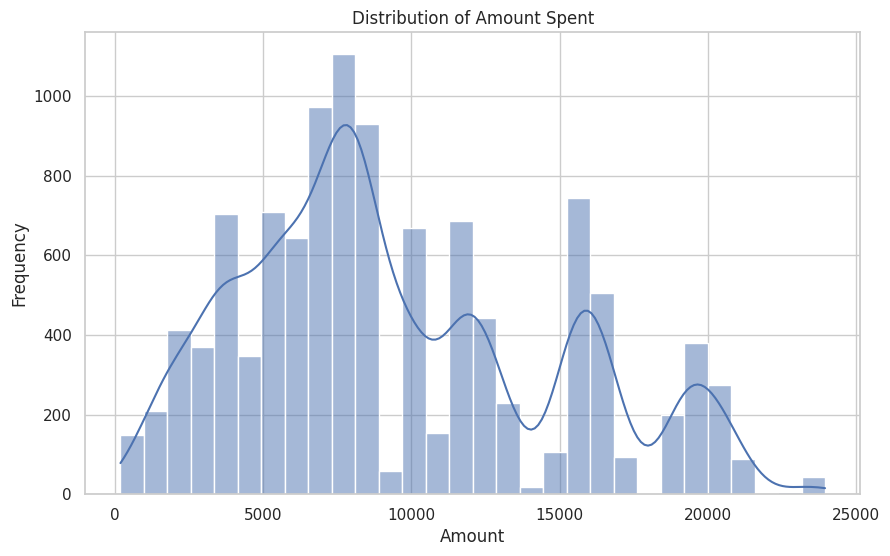

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting the distribution of Amount spent
plt.figure(figsize=(10, 6))
sns.histplot(diwali_sales_data_cleaned['Amount'], bins=30, kde=True)
plt.title('Distribution of Amount Spent')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


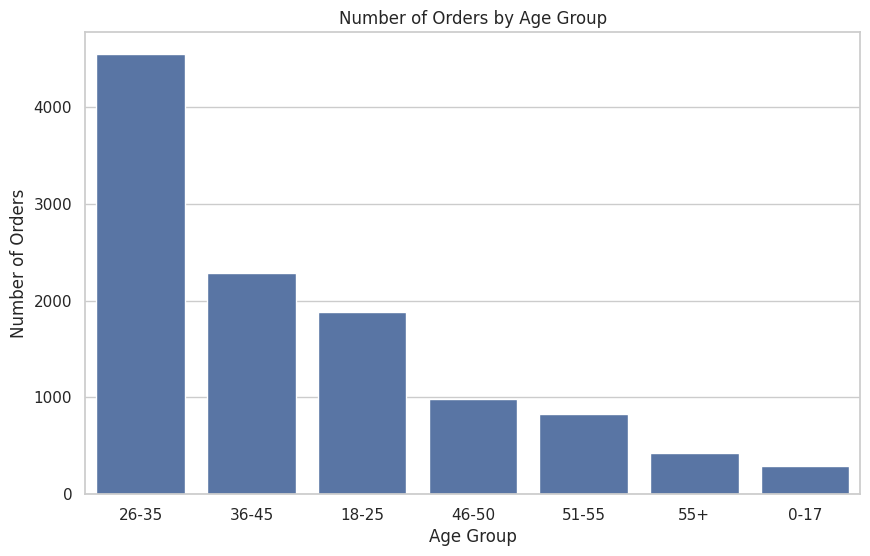

In [45]:
# Plotting the number of orders by different Age Groups
plt.figure(figsize=(10, 6))
sns.countplot(data=diwali_sales_data_cleaned, x='Age Group', order=diwali_sales_data_cleaned['Age Group'].value_counts().index)
plt.title('Number of Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.show()

Number of orders by different Age Groups

<ipython-input-46-4181da708cfa>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=diwali_sales_data_cleaned, x='Occupation', y='Amount', estimator='mean', ci=None)


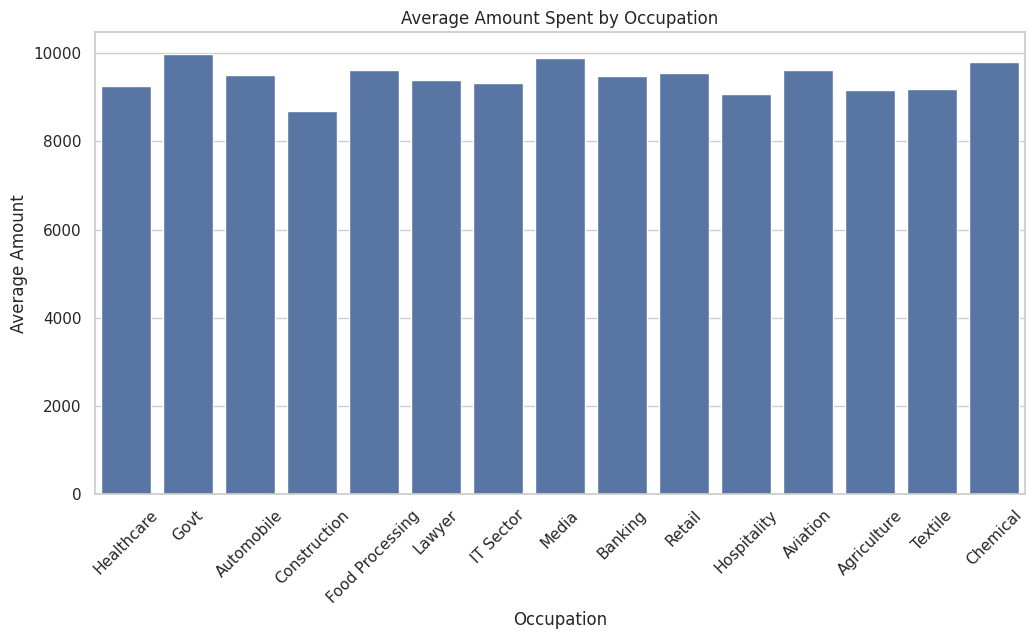

In [46]:
# Plotting the average amount spent by different Occupations
plt.figure(figsize=(12, 6))
sns.barplot(data=diwali_sales_data_cleaned, x='Occupation', y='Amount', estimator='mean', ci=None)
plt.title('Average Amount Spent by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.show()

<ipython-input-47-970d27ded9da>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=diwali_sales_data_cleaned, x='Occupation', y='Amount', ci=None)


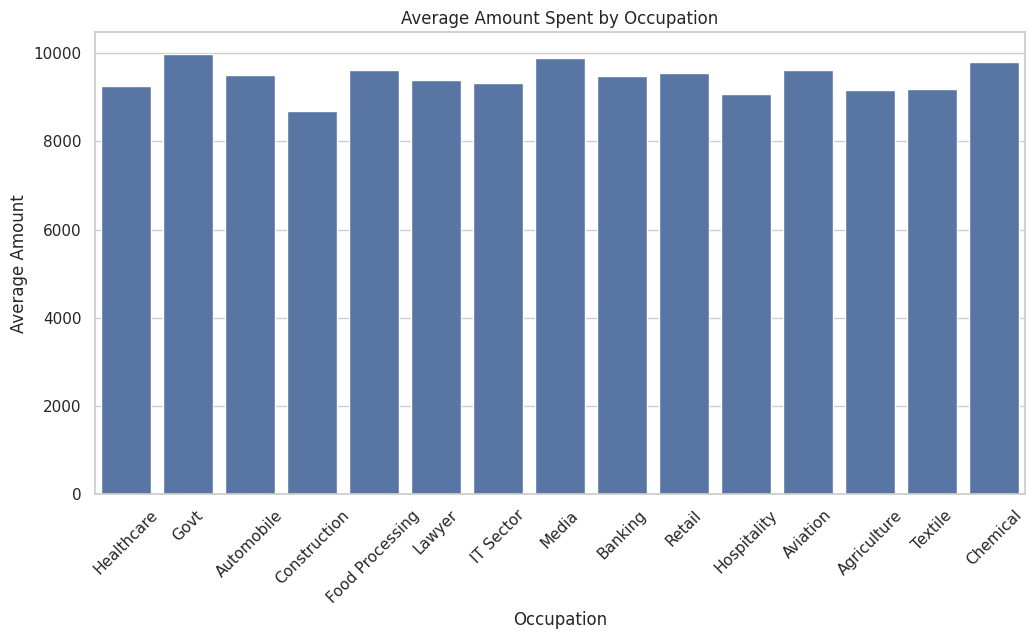

In [47]:
# Correcting the issue and re-plotting the average amount spent by different Occupations
plt.figure(figsize=(12, 6))
sns.barplot(data=diwali_sales_data_cleaned, x='Occupation', y='Amount', ci=None)
plt.title('Average Amount Spent by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.show()

Average amount spent by different Occupations

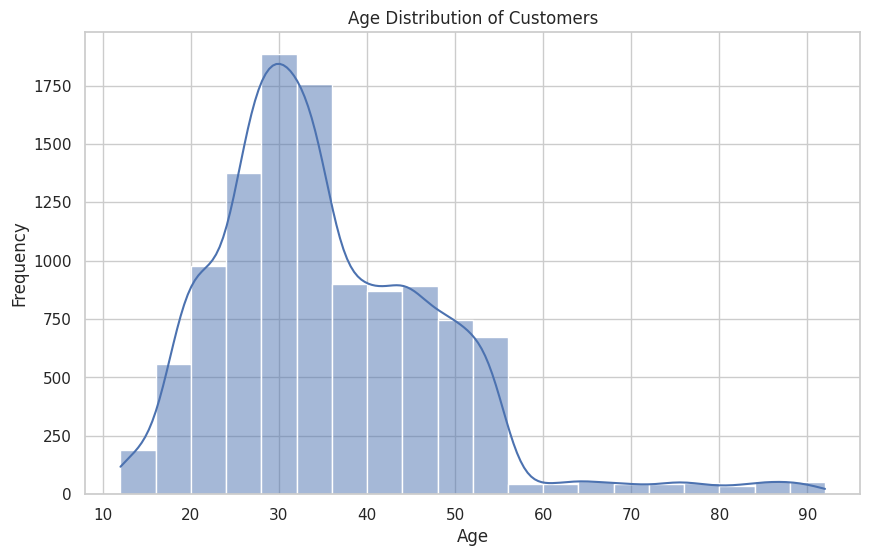

In [48]:
# Analyzing Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(diwali_sales_data_cleaned['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Gender Distribution

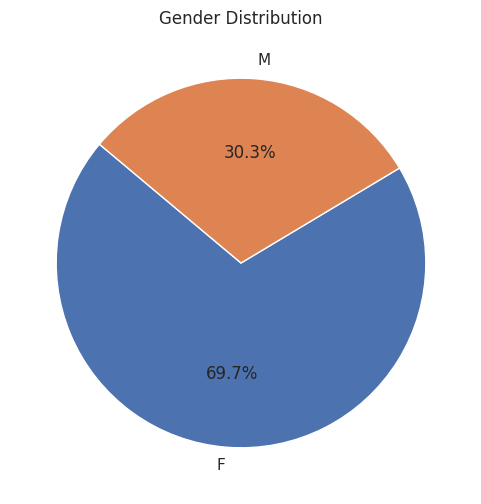

In [49]:
# Analyzing Gender Distribution
plt.figure(figsize=(6, 6))
gender_counts = diwali_sales_data_cleaned['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()



 Marital Status Distribution

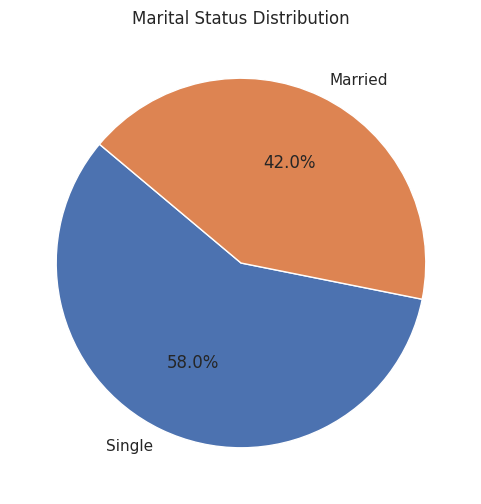

In [50]:
# Analyzing Marital Status Distribution
plt.figure(figsize=(6, 6))
marital_status_counts = diwali_sales_data_cleaned['Marital_Status'].value_counts()
plt.pie(marital_status_counts, labels=['Single', 'Married'], autopct='%1.1f%%', startangle=140)
plt.title('Marital Status Distribution')
plt.show()


Occupation Distribution

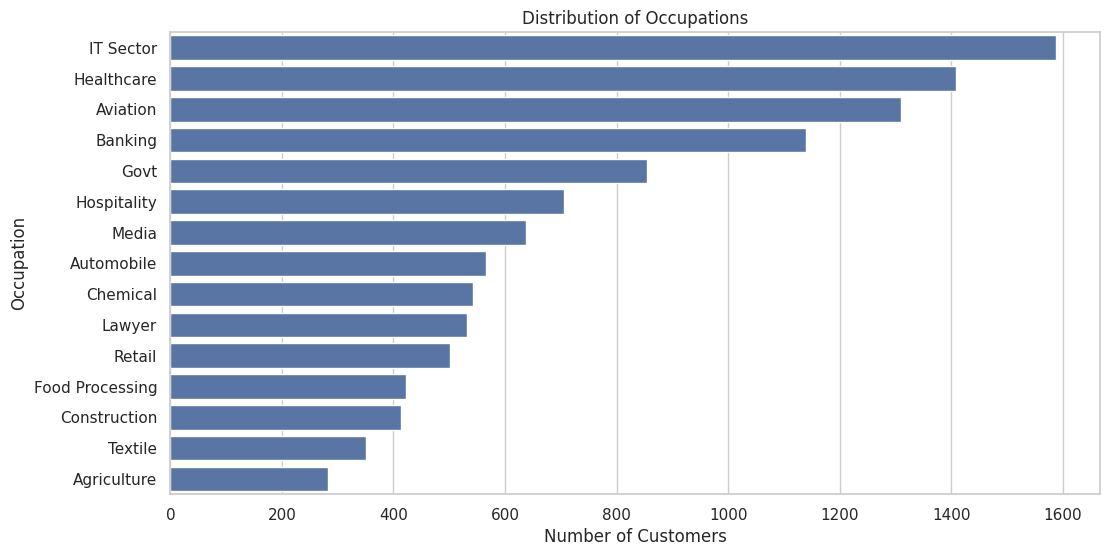

In [51]:
# Analyzing Occupation Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=diwali_sales_data_cleaned, y='Occupation', order=diwali_sales_data_cleaned['Occupation'].value_counts().index)
plt.title('Distribution of Occupations')
plt.xlabel('Number of Customers')
plt.ylabel('Occupation')
plt.show()


Product Category Distribution

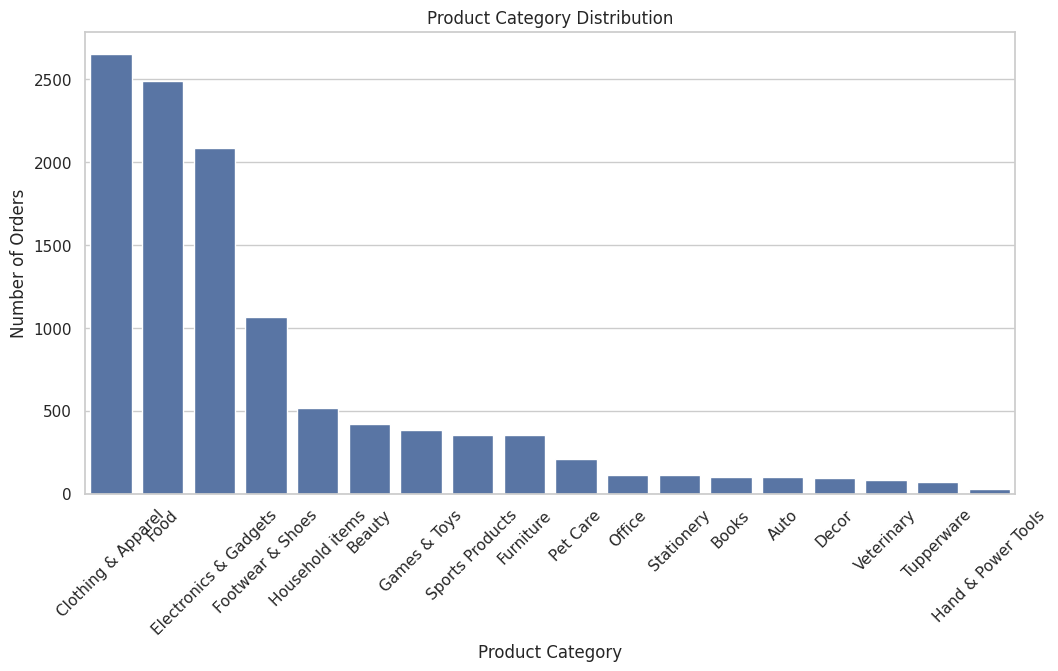

In [52]:
# Analyzing Product Category Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=diwali_sales_data_cleaned, x='Product_Category', order=diwali_sales_data_cleaned['Product_Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

Geographic Distribution (State-wise)

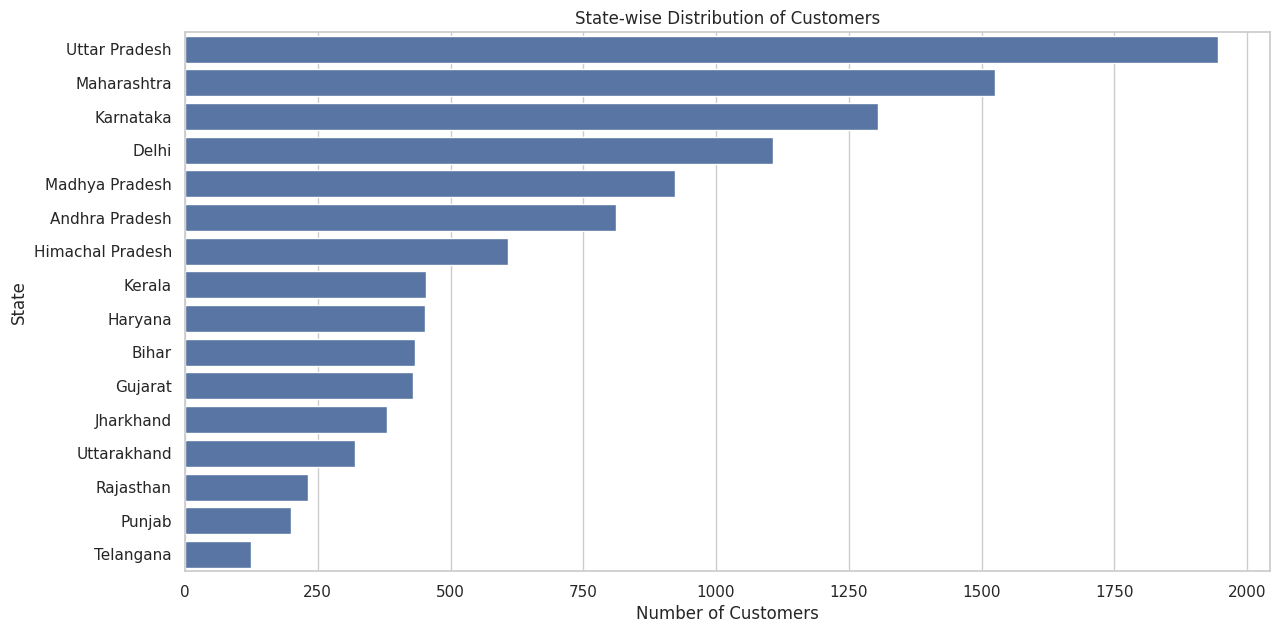

In [53]:
# Analyzing Geographic Distribution (State-wise)
plt.figure(figsize=(14, 7))
sns.countplot(data=diwali_sales_data_cleaned, y='State', order=diwali_sales_data_cleaned['State'].value_counts().index)
plt.title('State-wise Distribution of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('State')
plt.show()

# **Cluster Analysis**

In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming diwali_sales_data_cleaned is your cleaned DataFrame
# Refining Cluster Analysis
# Selecting the relevant features for clustering
features_refined = diwali_sales_data_cleaned[['Age', 'Marital_Status', 'Orders', 'Amount']]

# Scaling the features for better clustering performance
scaler = StandardScaler()  # Define the scaler
scaled_features_refined = scaler.fit_transform(features_refined)

# Performing KMeans Clustering with an optimal number of clusters
kmeans_refined = KMeans(n_clusters=4, random_state=42)
diwali_sales_data_cleaned['Cluster_Refined'] = kmeans_refined.fit_predict(scaled_features_refined)

# Analyzing the clusters - Only considering numeric columns for mean calculation
numeric_columns = diwali_sales_data_cleaned.select_dtypes(include=['number']).columns
cluster_summary = diwali_sales_data_cleaned.groupby('Cluster_Refined')[numeric_columns].mean()
print(cluster_summary)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                      User_ID        Age  Marital_Status    Orders  \
Cluster_Refined                                                      
0                1.002982e+06  36.028132        0.438242  2.338901   
1                1.002947e+06  35.639084        0.000000  3.539342   
2                1.003017e+06  35.084405        1.000000  2.492765   
3                1.003067e+06  35.139929        0.000000  1.498620   

                       Amount  Cluster_Refined  
Cluster_Refined                                 
0                17690.082387              0.0  
1                 7820.617370              1.0  
2                 7138.482553              2.0  
3                 7215.770683              3.0  


# **Predictive Modeling**

In [55]:
from sklearn.linear_model import LinearRegression

# Function to build and evaluate regression models for each cluster
def build_and_evaluate_model(cluster_data, cluster_id):
    X_cluster = cluster_data[['Age', 'Marital_Status', 'Orders']]
    y_cluster = cluster_data['Amount']

    # Splitting the data into training and testing sets
    X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Training a Linear Regression model
    model_cluster = LinearRegression()
    model_cluster.fit(X_train_cluster, y_train_cluster)

    # Making predictions
    y_pred_cluster = model_cluster.predict(X_test_cluster)

    # Evaluating the model
    mse_cluster = mean_squared_error(y_test_cluster, y_pred_cluster)
    r2_cluster = r2_score(y_test_cluster, y_pred_cluster)

    print(f"Cluster {cluster_id} - MSE: {mse_cluster}, R2: {r2_cluster}")
    return mse_cluster, r2_cluster

# Building and evaluating models for each cluster
results = {}
for cluster_id in range(4):
    cluster_data = diwali_sales_data_cleaned[diwali_sales_data_cleaned['Cluster_Refined'] == cluster_id]
    results[cluster_id] = build_and_evaluate_model(cluster_data, cluster_id)

results


Cluster 0 - MSE: 4318719.034607789, R2: 0.022833282962988255
Cluster 1 - MSE: 13597602.23205746, R2: 0.025244478121546843
Cluster 2 - MSE: 10686415.444998978, R2: -0.007508699908875149
Cluster 3 - MSE: 10076150.371243972, R2: -0.0005890022701828812


{0: (4318719.034607789, 0.022833282962988255),
 1: (13597602.23205746, 0.025244478121546843),
 2: (10686415.444998978, -0.007508699908875149),
 3: (10076150.371243972, -0.0005890022701828812)}

# **Random Forest Model**

In [56]:
from sklearn.ensemble import RandomForestRegressor

def build_and_evaluate_rf_model(cluster_data, cluster_id):
    X_cluster = cluster_data[['Age', 'Marital_Status', 'Orders']]
    y_cluster = cluster_data['Amount']

    X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_cluster, y_train_cluster)

    y_pred_cluster = rf_model.predict(X_test_cluster)

    mse_cluster = mean_squared_error(y_test_cluster, y_pred_cluster)
    r2_cluster = r2_score(y_test_cluster, y_pred_cluster)

    print(f"Cluster {cluster_id} - RF MSE: {mse_cluster}, RF R2: {r2_cluster}")
    return mse_cluster, r2_cluster

rf_results = {}
for cluster_id in range(4):
    cluster_data = diwali_sales_data_cleaned[diwali_sales_data_cleaned['Cluster_Refined'] == cluster_id]
    rf_results[cluster_id] = build_and_evaluate_rf_model(cluster_data, cluster_id)

print(rf_results)


Cluster 0 - RF MSE: 5397890.080536959, RF R2: -0.2213432933832835
Cluster 1 - RF MSE: 13796244.250464436, RF R2: 0.01100465840812781
Cluster 2 - RF MSE: 11310585.038464488, RF R2: -0.06635502671244153
Cluster 3 - RF MSE: 11095551.770201609, RF R2: -0.10181832012621661
{0: (5397890.080536959, -0.2213432933832835), 1: (13796244.250464436, 0.01100465840812781), 2: (11310585.038464488, -0.06635502671244153), 3: (11095551.770201609, -0.10181832012621661)}


# **Data Cleaning**

In [57]:
# Drop irrelevant columns
diwali_sales_data_cleaned = diwali_sales_data.drop(columns=['Status', 'unnamed1'])

# Handle missing values in the 'Amount' column by filling with the mean of the column
diwali_sales_data_cleaned['Amount'].fillna(diwali_sales_data_cleaned['Amount'].mean(), inplace=True)

# Encode categorical variables
# We'll use one-hot encoding for categorical variables like 'Gender', 'State', 'Zone', 'Occupation', and 'Product_Category'
diwali_sales_data_encoded = pd.get_dummies(diwali_sales_data_cleaned, columns=['Gender', 'State', 'Zone', 'Occupation', 'Product_Category'], drop_first=True)

# Display the cleaned and encoded dataframe's first few rows to confirm
print(diwali_sales_data_encoded.head())



   User_ID  Cust_name Product_ID Age Group  Age  Marital_Status  Orders  \
0  1002903  Sanskriti  P00125942     26-35   28               0       1   
1  1000732     Kartik  P00110942     26-35   35               1       3   
2  1001990      Bindu  P00118542     26-35   35               1       3   
3  1001425     Sudevi  P00237842      0-17   16               0       2   
4  1000588       Joni  P00057942     26-35   28               1       2   

    Amount  Gender_M  State_Bihar  ...  Product_Category_Furniture  \
0  23952.0     False        False  ...                       False   
1  23934.0     False        False  ...                       False   
2  23924.0     False        False  ...                       False   
3  23912.0      True        False  ...                       False   
4  23877.0      True        False  ...                       False   

   Product_Category_Games & Toys  Product_Category_Hand & Power Tools  \
0                          False                       

# **Feature Engineering**

In [58]:
# Create new interaction features
diwali_sales_data_encoded['Age_Orders'] = diwali_sales_data_encoded['Age'] * diwali_sales_data_encoded['Orders']
diwali_sales_data_encoded['Marital_Orders'] = diwali_sales_data_encoded['Marital_Status'] * diwali_sales_data_encoded['Orders']

# Calculate average order value as a new feature
diwali_sales_data_encoded['Avg_Order_Value'] = diwali_sales_data_encoded['Amount'] / diwali_sales_data_encoded['Orders']

# Display the first few rows to check the new features
print(diwali_sales_data_encoded[['Age', 'Orders', 'Age_Orders', 'Marital_Orders', 'Avg_Order_Value']].head())


   Age  Orders  Age_Orders  Marital_Orders  Avg_Order_Value
0   28       1          28               0     23952.000000
1   35       3         105               3      7978.000000
2   35       3         105               3      7974.666667
3   16       2          32               0     11956.000000
4   28       2          56               2     11938.500000


# **XGBoost model**

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Define the features (X) and the target (y)
X = diwali_sales_data_encoded[['Age', 'Marital_Status', 'Orders', 'Age_Orders', 'Marital_Orders', 'Avg_Order_Value']]
y = diwali_sales_data_encoded['Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'XGBoost MSE: {mse}')
print(f'XGBoost R²: {r2}')


XGBoost MSE: 18758.81460684772
XGBoost R²: 0.9993239725248078
